In [7]:
import os
import pandas as pd
os.getcwd()

'g:\\My projects\\SpotifyTrendsAnalyzer\\Notebook'

In [8]:


# Try different encodings
df = pd.read_csv('../Data_set/spotify_songs_cleaned.csv', encoding='ISO-8859-1')



In [9]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.6,9.44,140.03,2:30
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990.0,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.0,23.50,135.90,3:58
2,#1 Stunna,Big Tymers,48,I Got That Work,2000.0,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.8,56.10,89.02,4:41
3,#NAKAMA,XLII,26,#NAKAMA,2019.0,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.8,56.80,108.04,3:12
4,#Natural,Paty Cant?§,50,#Natural,2017.0,latin hip hop,latin,latin hip hop,80.0,83.6,0,-3.54,0,5.68,11.400000,13.4,81.60,97.02,3:47


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         26158 non-null  object 
 1   track_artist       26158 non-null  object 
 2   track_popularity   26159 non-null  int64  
 3   track_album_name   26158 non-null  object 
 4   released_year      26139 non-null  float64
 5   playlist_name      26159 non-null  object 
 6   playlist_genre     26159 non-null  object 
 7   playlist_subgenre  26159 non-null  object 
 8   danceability       26159 non-null  float64
 9   energy             26159 non-null  float64
 10  key                26159 non-null  int64  
 11  loudness           26159 non-null  float64
 12  mode               26159 non-null  int64  
 13  speechiness        26159 non-null  float64
 14  acousticness       26159 non-null  float64
 15  liveness           26159 non-null  float64
 16  valence            261

In [11]:
df.describe(include='all')

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
count,26158,26158,26159.000000,26158,26139.000000,26159,26159,26159,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159
unique,23383,10690,NaN,18997,NaN,448,6,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472
top,Breathe,Queen,NaN,Greatest Hits,NaN,Indie Poptimism,rap,progressive electro house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3:24
freq,18,111,NaN,102,NaN,278,4983,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267
mean,NaN,NaN,40.497802,NaN,2006.460041,NaN,NaN,NaN,65.379678,69.624791,5.375779,-6.842483,0.563783,10.877297,18.097262,19.122692,50.620517,121.007711,NaN
std,NaN,NaN,23.209914,NaN,26.540004,NaN,NaN,NaN,14.558088,18.480863,3.614458,3.049061,0.495925,10.335517,22.633492,15.666042,23.469540,26.938576,NaN
min,NaN,NaN,0.000000,NaN,1905.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-46.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,24.000000,NaN,2008.000000,NaN,NaN,NaN,56.200000,57.700000,2.000000,-8.340000,0.000000,4.110000,1.440000,9.290000,32.400000,99.980000,NaN
50%,NaN,NaN,43.000000,NaN,2016.000000,NaN,NaN,NaN,67.000000,72.000000,6.000000,-6.280000,1.000000,6.300000,8.160000,12.700000,50.700000,122.020000,NaN
75%,NaN,NaN,58.000000,NaN,2019.000000,NaN,NaN,NaN,76.000000,84.200000,9.000000,-4.730000,1.000000,13.500000,26.800000,24.800000,69.000000,134.030000,NaN


In [12]:
non_alpha_artists = df[df['track_artist'].str.contains('[^a-zA-Z\s]', na=False)]

# Show the rows where 'track_artist' contains non-alphabetic characters
print(non_alpha_artists)

# Count the number of such rows
count_non_alpha_artists = non_alpha_artists.shape[0]
print(f"Number of rows with non-alphabetic characters in 'track_artist': {count_non_alpha_artists}")

                                     track_name       track_artist  \
4                                      #Natural        Paty Cant?§   
17                      (Don't Fear) The Reaper  Blue ??yster Cult   
18     (Don't Fear) The Reaper - Single Version  Blue ??yster Cult   
44                              *Low End Theory  Saturn, Alexander   
51                                       .suede            junyii.   
...                                         ...                ...   
26104                            Youth Memories            Flj?§ga   
26105                       Youth of the Nation             P.O.D.   
26133                          Zero For Conduct  Block B - BASTARZ   
26146                                    Zirkus        badm??mzjay   
26150                Zombie - Bassjackers Remix              Ran-D   

       track_popularity                           track_album_name  \
4                    50                                   #Natural   
17                 

In [14]:
count_all=df['track_artist'].count()
print(count_all)

26158


In [15]:
percentage_non_alpha=(count_non_alpha_artists/count_all)*100
print(percentage_non_alpha)

13.471977979967885


In [17]:
# Remove rows where 'track_artist' contains non-alphabetic characters and assign to df2
df2 = df[~df['track_artist'].str.contains('[^a-zA-Z\s]', na=False)]

# Verify the cleaned DataFrame
print(df2.head(5))

#


                             track_name     track_artist  track_popularity  \
0  I TRIED FOR YEARS... NOBODY LISTENED    Iceberg Black                18   
1                   This Is Seagull??.  The Snake Corps                34   
2                             #1 Stunna       Big Tymers                48   
3                               #NAKAMA             XLII                26   
5                              #S?­dico         Rawayana                53   

  track_album_name  released_year  \
0              WAR         2018.0   
1    Smother Earth         1990.0   
2  I Got That Work         2000.0   
3          #NAKAMA         2019.0   
5         #S?­dico         2019.0   

                                       playlist_name playlist_genre  \
0                 Rap Party 24/7 Radio / Gangsta Rap            rap   
1  Maxi Pop  GOLD (New Wave, Electropop, Synth Po...            pop   
2                                      Hip-Hop Drive            rap   
3                       

In [19]:
non_alpha_track_names = df[df['track_name'].str.contains('[^a-zA-Z\s]', na=False)]
count_non_alpha_tracks = non_alpha_track_names.shape[0]
print(count_non_alpha_tracks)

9945


In [56]:
print(non_alpha_track_names['released_year']==2020)



0        False
1        False
2        False
3        False
4        False
         ...  
26145     True
26147    False
26150    False
26152    False
26154    False
Name: released_year, Length: 9945, dtype: bool


In [57]:
# Group by the released year and count the number of non-alpha track names for each year
non_alpha_count_per_year = non_alpha_track_names.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
non_alpha_count_df = non_alpha_count_per_year.reset_index()
non_alpha_count_df.columns = ['Released Year', 'Non-Alphabetic Track Count']

# Sort the DataFrame by 'Non-Alphabetic Track Count' in descending order (optional)
non_alpha_count_df = non_alpha_count_df.sort_values(by='Non-Alphabetic Track Count', ascending=False)

# Display the resulting DataFrame
non_alpha_count_df

,Released Year,Non-Alphabetic Track Count
57,2019.0,2380
56,2018.0,971
55,2017.0,718
54,2016.0,667
53,2015.0,667
0,1905.0,613
52,2014.0,596
51,2013.0,353
50,2012.0,236
46,2008.0,181


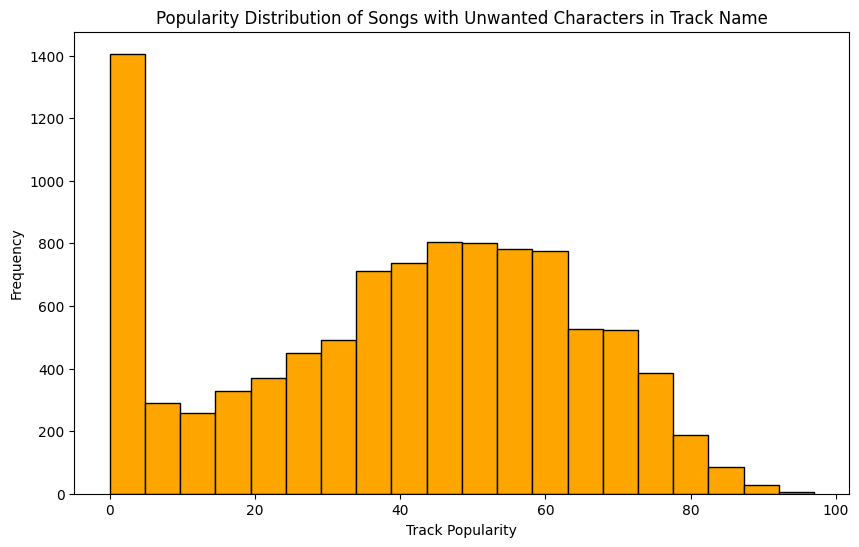

In [28]:
import matplotlib.pyplot as plt

# Plot popularity distribution for the unwanted rows (based on track_name)
plt.figure(figsize=(10, 6))
plt.hist(non_alpha_track_names['track_popularity'], bins=20, color='orange', edgecolor='black')
plt.title('Popularity Distribution of Songs with Unwanted Characters in Track Name')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()


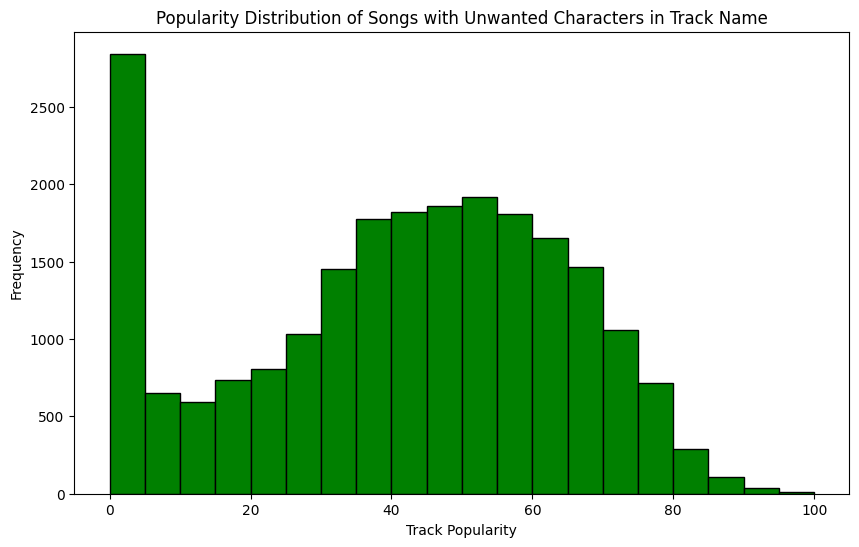

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df2['track_popularity'], bins=20, color='green', edgecolor='black')
plt.title('Popularity Distribution of Songs with Unwanted Characters in Track Name')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

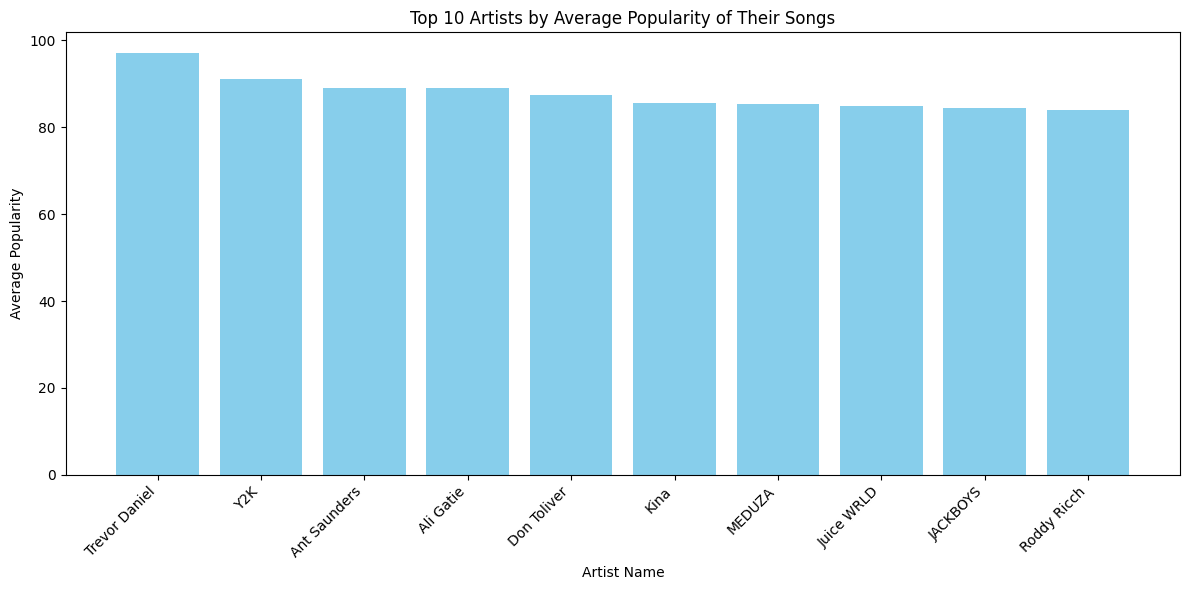

In [30]:
# Group by artist and calculate the average popularity of their songs
average_popularity_by_artist = df.groupby('track_artist')['track_popularity'].mean()

# Sort the artists by their average popularity and get the top 10
top_10_artists = average_popularity_by_artist.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for easier plotting
top_10_artists_df = top_10_artists.reset_index()


# Create a bar chart for the top 10 artists by average popularity
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_df['track_artist'], top_10_artists_df['track_popularity'], color='skyblue')
plt.title('Top 10 Artists by Average Popularity of Their Songs')
plt.xlabel('Artist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [31]:
# Count the occurrences of alphanumeric tracks by each artist
alphanumeric_artist_count = non_alpha_track_names['track_artist'].value_counts().reset_index()
alphanumeric_artist_count.columns = ['track_artist', 'alphanumeric_track_count']

# Display the count
print(alphanumeric_artist_count)


                   track_artist  alphanumeric_track_count
0                         Queen                       105
1                  David Guetta                        54
2                 Martin Garrix                        50
3     Dimitri Vegas & Like Mike                        37
4                 Calvin Harris                        36
...                         ...                       ...
4906               INTERSECTION                         1
4907               Aaron Taylor                         1
4908               Jason Parris                         1
4909                        k?d                         1
4910                  Roosevelt                         1

[4911 rows x 2 columns]


In [34]:
df2.head(1)

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.1,2.68,11.6,9.44,140.03,2:30


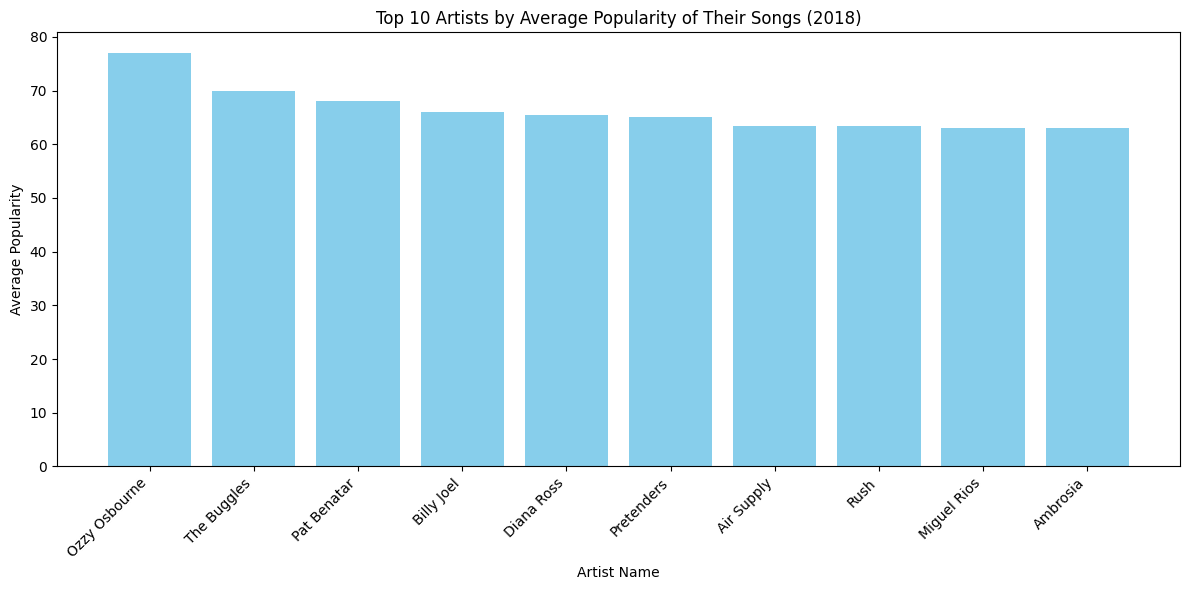

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Spotify data

# Filter the DataFrame for songs released in 2018
df_2018 = df2[df2['released_year'] == 1980]

# Group by artist and calculate the average popularity of their songs for the year 2018
average_popularity_by_artist_2018 = df_2018.groupby('track_artist')['track_popularity'].mean()

# Sort the artists by their average popularity and get the top 10
top_10_artists_2018 = average_popularity_by_artist_2018.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for easier plotting
top_10_artists_2018_df = top_10_artists_2018.reset_index()

# Create a bar chart for the top 10 artists by average popularity for 2018
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_2018_df['track_artist'], top_10_artists_2018_df['track_popularity'], color='skyblue')
plt.title('Top 10 Artists by Average Popularity of Their Songs (2018)')
plt.xlabel('Artist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


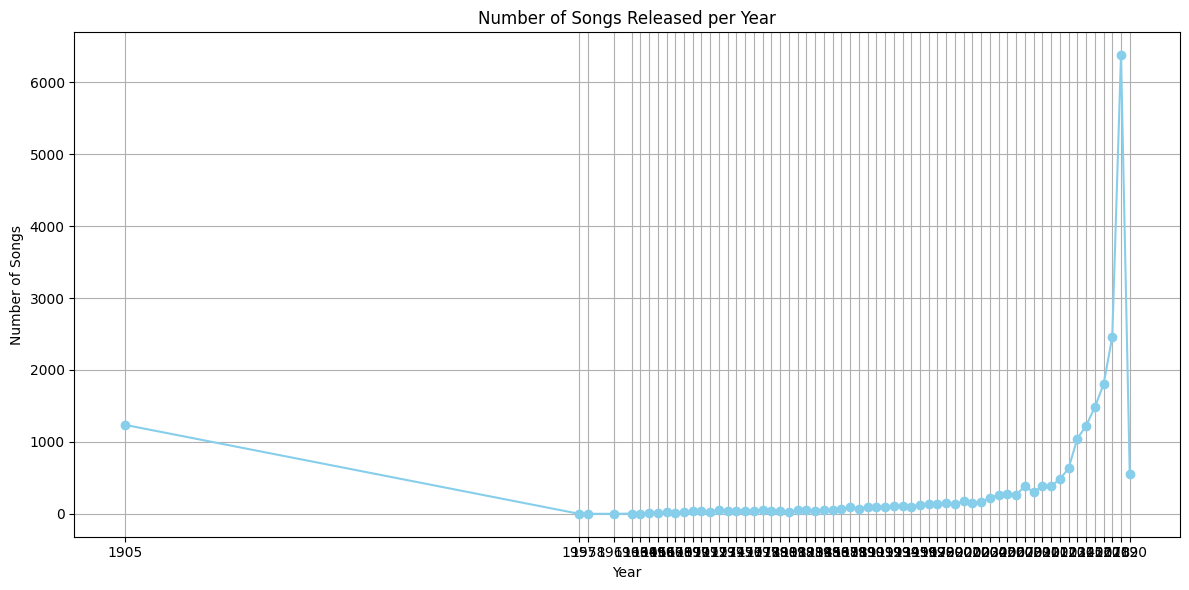

In [48]:


# Group by the released year and count the number of songs for each year
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Alternatively, you can use size() to get the same result
# songs_per_year = df.groupby('released_year').size()

# Sort the result by year (optional, if not already sorted)
songs_per_year = songs_per_year.sort_index()

# Convert the result to a DataFrame for easier plotting
songs_per_year_df = songs_per_year.reset_index()
songs_per_year_df.columns = ['released_year', 'number_of_songs']

# Create a line chart for the number of songs released each year
plt.figure(figsize=(12, 6))
plt.plot(songs_per_year_df['released_year'], songs_per_year_df['number_of_songs'], marker='o', color='skyblue')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(songs_per_year_df['released_year'])  # Show all years on the x-axis
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


    Released Year  Number of Songs
0          1905.0             1238
1          1957.0                1
2          1958.0                1
3          1961.0                1
4          1963.0                4
..            ...              ...
57         2016.0             1481
58         2017.0             1799
59         2018.0             2457
60         2019.0             6374
61         2020.0              550

[62 rows x 2 columns]


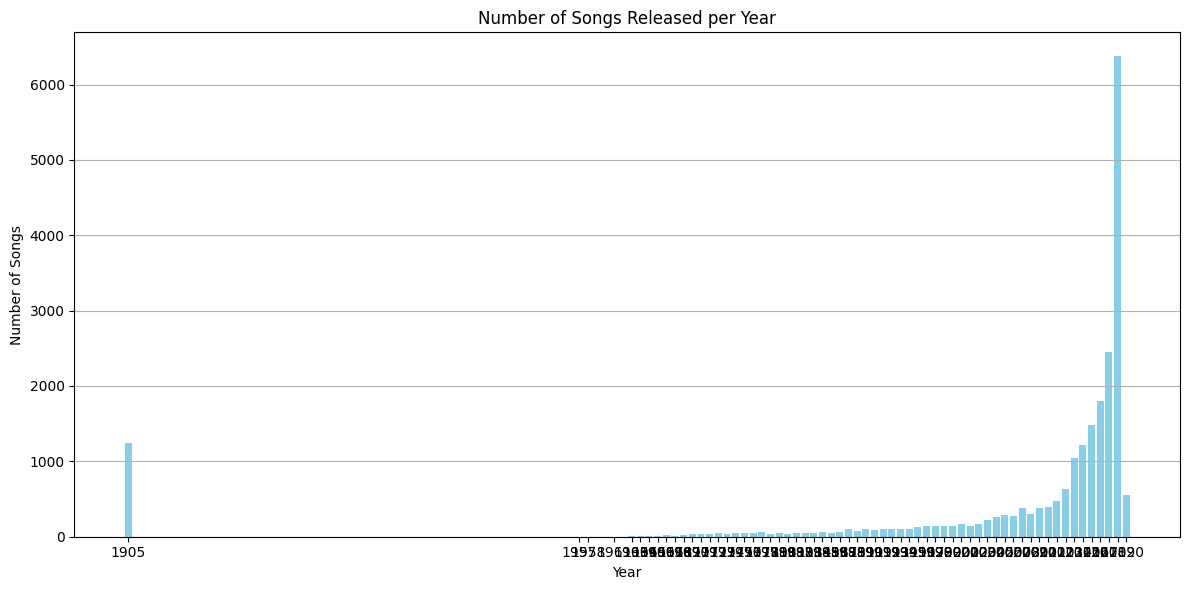

In [49]:
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
songs_per_year_df = songs_per_year.reset_index()
songs_per_year_df.columns = ['Released Year', 'Number of Songs']

# Display the table
print(songs_per_year_df)

# Optionally, create a bar chart for visual representation
plt.figure(figsize=(12, 6))
plt.bar(songs_per_year_df['Released Year'], songs_per_year_df['Number of Songs'], color='skyblue')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(songs_per_year_df['Released Year'])  # Show all years on the x-axis
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [54]:


# Group by the released year and count the number of songs for each year
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
songs_per_year_df = songs_per_year_df.sort_values(by='Number of Songs', ascending=False)
songs_per_year_df.columns = ['Released Year', 'Number of Songs']

# Display the DataFrame (it will show in a nice tabular format in Jupyter or other IDEs)
songs_per_year_df.head(100)

,Released Year,Number of Songs
60,2019.0,6374
59,2018.0,2457
58,2017.0,1799
57,2016.0,1481
0,1905.0,1238
...,...,...
5,1964.0,4
4,1963.0,4
1,1957.0,1
3,1961.0,1
